## LSTM Forecasting

• Use Case: Predict sales for medicines with promotion-driven or nonlinear demand patterns (e.g., vitamins, supplements).


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
import math
import random

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [5]:
SEED = 42
LOOKBACK = 30
FORECAST_HORIZON = 30
BATCH_SIZE = 32
EPOCHS = 100

In [6]:
np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)

In [ ]:
df_all = pd.read_csv("C:/Users/Admin/NIYOJAN/Data/Synthetic/Training/Lstm_data.csv")
df_all["date"] = pd.to_datetime(df_all["date"])

In [ ]:
LOOKBACK = 30
FORECAST_HORIZON = 30
PRODUCTS = ["Paracetamol_500mg", "Vitamin_C", "Antibiotic_A",
            "Insulin_Supplies", "PainRelief_Gel"]
MODEL_DIR = "C:/Users/Admin/IIS/Models/Lstm"
FORECAST_DIR = "C:/Users/Admin/NIYOJAN/Forecasts/Lstm"

In [9]:
def create_sequences(df, features, target_col="sales_scaled"):
    X, y = [], []
    for i in range(LOOKBACK, len(df)):
        X.append(df[features].iloc[i-LOOKBACK:i].values)
        y.append(df[target_col].iloc[i])
    return np.array(X), np.array(y)

In [10]:
master_forecast_df = pd.DataFrame()


=== Training LSTM for Paracetamol_500mg ===
Epoch 1/100


c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 - 5s - 206ms/step - loss: 0.0766 - mae: 0.2242 - val_loss: 0.0488 - val_mae: 0.1849
Epoch 2/100
23/23 - 1s - 29ms/step - loss: 0.0341 - mae: 0.1445 - val_loss: 0.0270 - val_mae: 0.1268
Epoch 3/100
23/23 - 1s - 23ms/step - loss: 0.0304 - mae: 0.1355 - val_loss: 0.0252 - val_mae: 0.1218
Epoch 4/100
23/23 - 1s - 24ms/step - loss: 0.0282 - mae: 0.1323 - val_loss: 0.0259 - val_mae: 0.1236
Epoch 5/100
23/23 - 1s - 27ms/step - loss: 0.0288 - mae: 0.1342 - val_loss: 0.0263 - val_mae: 0.1258
Epoch 6/100
23/23 - 1s - 28ms/step - loss: 0.0272 - mae: 0.1295 - val_loss: 0.0276 - val_mae: 0.1291
Epoch 7/100
23/23 - 1s - 26ms/step - loss: 0.0277 - mae: 0.1312 - val_loss: 0.0291 - val_mae: 0.1343
Epoch 8/100
23/23 - 1s - 28ms/step - loss: 0.0263 - mae: 0.1271 - val_loss: 0.0287 - val_mae: 0.1346
Epoch 9/100
23/23 - 1s - 28ms/step - loss: 0.0266 - mae: 0.1278 - val_loss: 0.0292 - val_mae: 0.1362
Epoch 10/100
23/23 - 1s - 25ms/step - loss: 0.0257 - mae: 0.1257 - val_loss: 0.0251 - val_mae: 0.1244


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step
Paracetamol_500mg Test RMSE: 9.518, MAE: 7.598
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


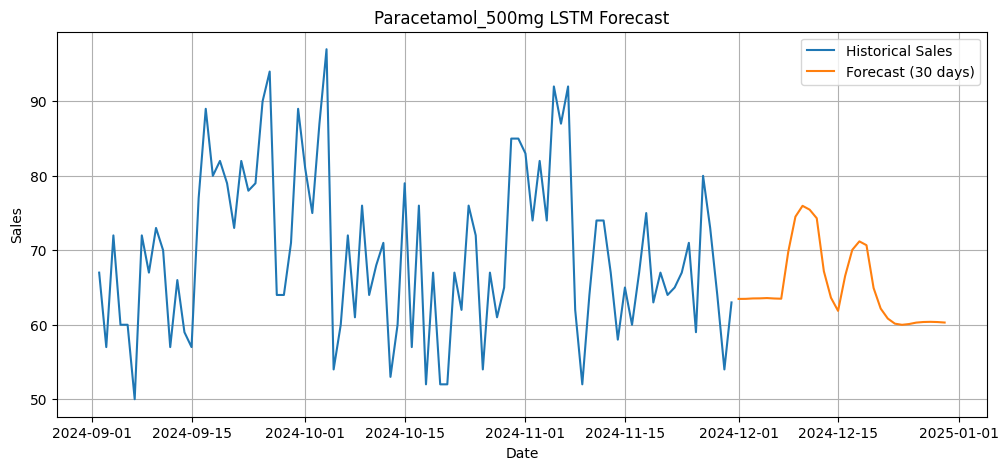


=== Training LSTM for Vitamin_C ===
Epoch 1/100


c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 - 6s - 251ms/step - loss: 0.0477 - mae: 0.1661 - val_loss: 0.0460 - val_mae: 0.1777
Epoch 2/100
23/23 - 1s - 25ms/step - loss: 0.0224 - mae: 0.1148 - val_loss: 0.0320 - val_mae: 0.1409
Epoch 3/100
23/23 - 1s - 25ms/step - loss: 0.0208 - mae: 0.1107 - val_loss: 0.0276 - val_mae: 0.1300
Epoch 4/100
23/23 - 1s - 25ms/step - loss: 0.0195 - mae: 0.1059 - val_loss: 0.0288 - val_mae: 0.1353
Epoch 5/100
23/23 - 1s - 25ms/step - loss: 0.0187 - mae: 0.1054 - val_loss: 0.0271 - val_mae: 0.1306
Epoch 6/100
23/23 - 1s - 26ms/step - loss: 0.0180 - mae: 0.1024 - val_loss: 0.0262 - val_mae: 0.1286
Epoch 7/100
23/23 - 1s - 24ms/step - loss: 0.0187 - mae: 0.1054 - val_loss: 0.0265 - val_mae: 0.1287
Epoch 8/100
23/23 - 1s - 31ms/step - loss: 0.0168 - mae: 0.1002 - val_loss: 0.0224 - val_mae: 0.1182
Epoch 9/100
23/23 - 1s - 29ms/step - loss: 0.0171 - mae: 0.1000 - val_loss: 0.0224 - val_mae: 0.1180
Epoch 10/100
23/23 - 1s - 26ms/step - loss: 0.0168 - mae: 0.1004 - val_loss: 0.0207 - val_mae: 0.1119


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step
Vitamin_C Test RMSE: 6.218, MAE: 4.816
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step

c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step

c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step

c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step

c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step

c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


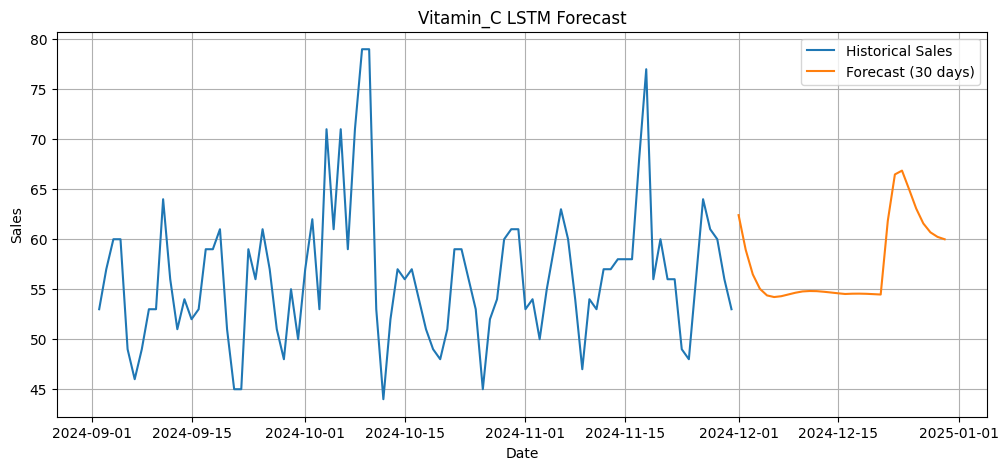


=== Training LSTM for Antibiotic_A ===
Epoch 1/100


c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 - 4s - 175ms/step - loss: 0.0567 - mae: 0.1861 - val_loss: 0.0699 - val_mae: 0.2020
Epoch 2/100
23/23 - 1s - 27ms/step - loss: 0.0264 - mae: 0.1242 - val_loss: 0.0581 - val_mae: 0.1817
Epoch 3/100
23/23 - 1s - 24ms/step - loss: 0.0225 - mae: 0.1151 - val_loss: 0.0473 - val_mae: 0.1647
Epoch 4/100
23/23 - 1s - 24ms/step - loss: 0.0204 - mae: 0.1095 - val_loss: 0.0423 - val_mae: 0.1571
Epoch 5/100
23/23 - 1s - 23ms/step - loss: 0.0214 - mae: 0.1119 - val_loss: 0.0396 - val_mae: 0.1529
Epoch 6/100
23/23 - 1s - 24ms/step - loss: 0.0205 - mae: 0.1094 - val_loss: 0.0370 - val_mae: 0.1487
Epoch 7/100
23/23 - 1s - 24ms/step - loss: 0.0192 - mae: 0.1067 - val_loss: 0.0360 - val_mae: 0.1465
Epoch 8/100
23/23 - 1s - 24ms/step - loss: 0.0186 - mae: 0.1048 - val_loss: 0.0384 - val_mae: 0.1506
Epoch 9/100
23/23 - 1s - 24ms/step - loss: 0.0183 - mae: 0.1046 - val_loss: 0.0281 - val_mae: 0.1343
Epoch 10/100
23/23 - 1s - 25ms/step - loss: 0.0179 - mae: 0.1042 - val_loss: 0.0325 - val_mae: 0.1412


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step
Antibiotic_A Test RMSE: 6.079, MAE: 4.751
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step

c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step

c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


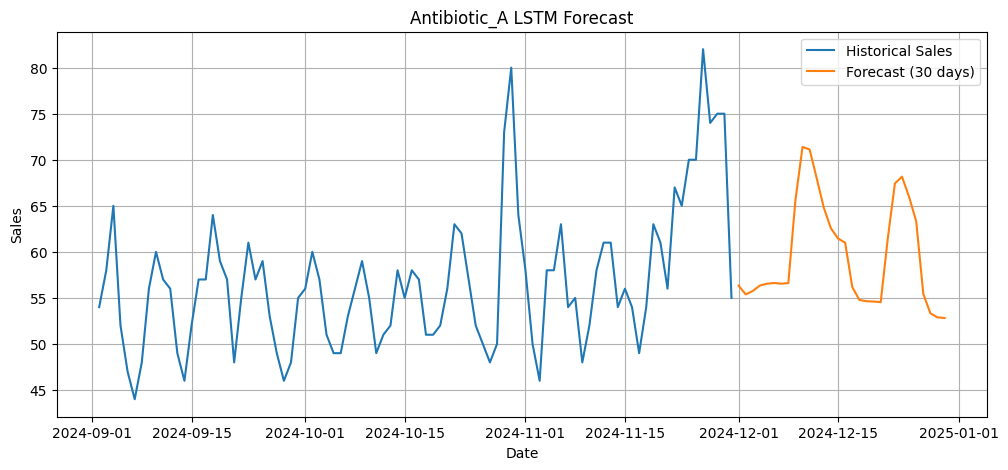


=== Training LSTM for Insulin_Supplies ===
Epoch 1/100


c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 - 4s - 163ms/step - loss: 0.0423 - mae: 0.1582 - val_loss: 0.0387 - val_mae: 0.1482
Epoch 2/100
23/23 - 1s - 24ms/step - loss: 0.0210 - mae: 0.1105 - val_loss: 0.0256 - val_mae: 0.1169
Epoch 3/100
23/23 - 1s - 24ms/step - loss: 0.0192 - mae: 0.1057 - val_loss: 0.0228 - val_mae: 0.1117
Epoch 4/100
23/23 - 1s - 24ms/step - loss: 0.0172 - mae: 0.1013 - val_loss: 0.0190 - val_mae: 0.1040
Epoch 5/100
23/23 - 1s - 27ms/step - loss: 0.0160 - mae: 0.0969 - val_loss: 0.0191 - val_mae: 0.1034
Epoch 6/100
23/23 - 1s - 38ms/step - loss: 0.0161 - mae: 0.0986 - val_loss: 0.0196 - val_mae: 0.1043
Epoch 7/100
23/23 - 1s - 40ms/step - loss: 0.0159 - mae: 0.0955 - val_loss: 0.0184 - val_mae: 0.1014
Epoch 8/100
23/23 - 1s - 31ms/step - loss: 0.0157 - mae: 0.0967 - val_loss: 0.0173 - val_mae: 0.1001
Epoch 9/100
23/23 - 1s - 27ms/step - loss: 0.0155 - mae: 0.0959 - val_loss: 0.0179 - val_mae: 0.1002
Epoch 10/100
23/23 - 1s - 29ms/step - loss: 0.0149 - mae: 0.0919 - val_loss: 0.0181 - val_mae: 0.0999


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step
Insulin_Supplies Test RMSE: 5.812, MAE: 4.553
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step

c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step

c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step

c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


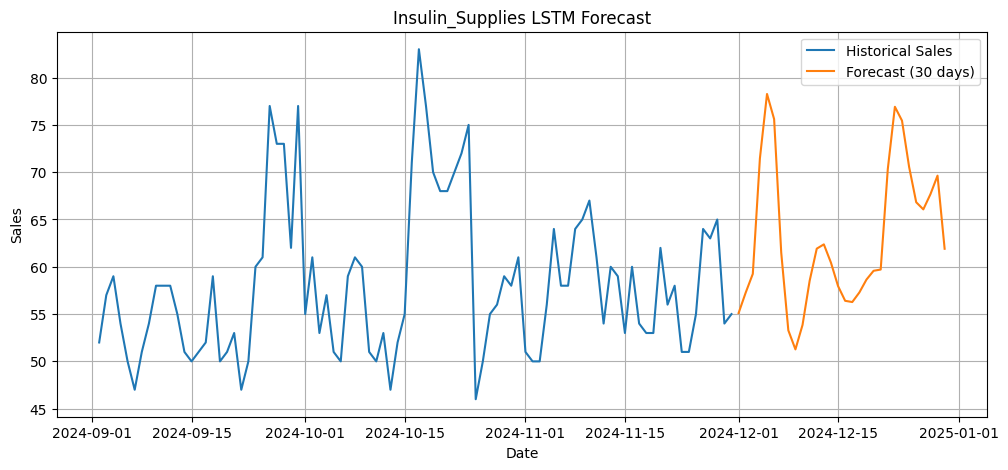


=== Training LSTM for PainRelief_Gel ===
Epoch 1/100


c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 - 4s - 172ms/step - loss: 0.0492 - mae: 0.1622 - val_loss: 0.0369 - val_mae: 0.1244
Epoch 2/100
23/23 - 1s - 25ms/step - loss: 0.0326 - mae: 0.1339 - val_loss: 0.0337 - val_mae: 0.1224
Epoch 3/100
23/23 - 1s - 25ms/step - loss: 0.0306 - mae: 0.1303 - val_loss: 0.0319 - val_mae: 0.1200
Epoch 4/100
23/23 - 1s - 28ms/step - loss: 0.0287 - mae: 0.1253 - val_loss: 0.0277 - val_mae: 0.1126
Epoch 5/100
23/23 - 1s - 26ms/step - loss: 0.0276 - mae: 0.1208 - val_loss: 0.0301 - val_mae: 0.1169
Epoch 6/100
23/23 - 1s - 28ms/step - loss: 0.0262 - mae: 0.1185 - val_loss: 0.0322 - val_mae: 0.1224
Epoch 7/100
23/23 - 1s - 29ms/step - loss: 0.0262 - mae: 0.1194 - val_loss: 0.0308 - val_mae: 0.1205
Epoch 8/100
23/23 - 1s - 26ms/step - loss: 0.0257 - mae: 0.1152 - val_loss: 0.0295 - val_mae: 0.1175
Epoch 9/100
23/23 - 1s - 28ms/step - loss: 0.0245 - mae: 0.1129 - val_loss: 0.0278 - val_mae: 0.1147
Epoch 10/100
23/23 - 1s - 27ms/step - loss: 0.0240 - mae: 0.1103 - val_loss: 0.0251 - val_mae: 0.1080


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step
PainRelief_Gel Test RMSE: 10.800, MAE: 7.311
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step

c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step

c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step

c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step

c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step

c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step

c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step

c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\dl_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


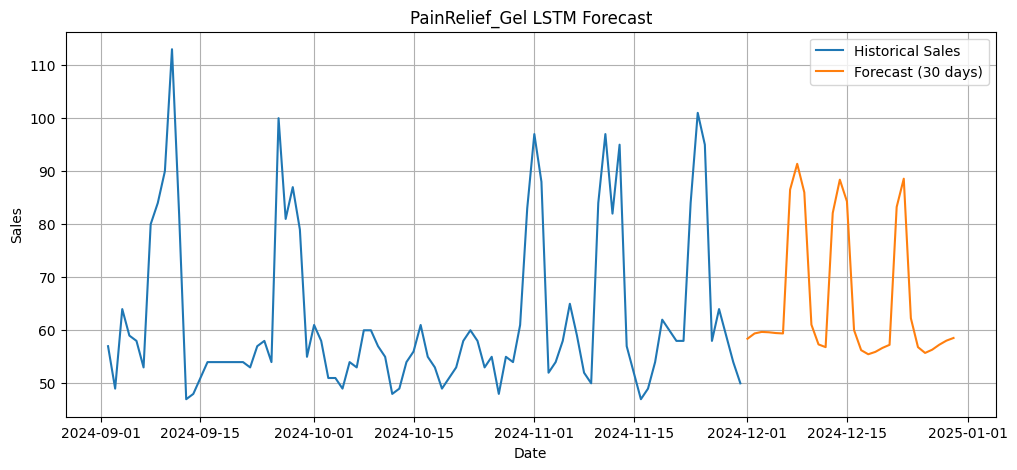

In [11]:
for product in PRODUCTS:
    print(f"\n=== Training LSTM for {product} ===")
    
    df_product = df_all[df_all["product"]==product].copy().reset_index(drop=True)
    if df_product.empty:
        print(f"⚠️ No data found for {product}, skipping...")
        continue
    
    df_product.set_index("date", inplace=True)
    
    # Scaling
    scaler_sales = MinMaxScaler()
    scaler_exog = MinMaxScaler()
    
    df_product["sales_scaled"] = scaler_sales.fit_transform(df_product[["sales"]])
    df_product[["promotion_scaled","holiday_scaled"]] = scaler_exog.fit_transform(
        df_product[["promotion","holiday"]])
    
    features = ["sales_scaled","promotion_scaled","holiday_scaled"]
    X, y = create_sequences(df_product, features)
    
    # Train/val/test split
    train_size = int(0.7*len(X))
    val_size = int(0.15*len(X))
    X_train, y_train = X[:train_size], y[:train_size]
    X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]
    X_test, y_test = X[train_size+val_size:], y[train_size+val_size:]
    
    # Build LSTM
    model = Sequential([
        LSTM(64, input_shape=(LOOKBACK,len(features)), return_sequences=True),
        Dropout(0.2),
        LSTM(32, return_sequences=False),
        Dropout(0.2),
        Dense(16, activation="relu"),
        Dense(1, activation="linear")
    ])
    
    model.compile(optimizer="adam", loss="mse", metrics=["mae"])
    
    # Callbacks
    es = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
    
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=100,
        batch_size=32,
        callbacks=[es],
        verbose=2
    )
    
    # Save final model
    
    model.save(os.path.join(MODEL_DIR, f"{product}_lstm.h5"))
    
    # ---------------------------
    # Evaluate on test
    # ---------------------------
    y_pred_scaled = model.predict(X_test).ravel()
    y_pred = scaler_sales.inverse_transform(y_pred_scaled.reshape(-1,1)).ravel()
    y_test_unscaled = scaler_sales.inverse_transform(y_test.reshape(-1,1)).ravel()
    
    rmse_test = math.sqrt(mean_squared_error(y_test_unscaled, y_pred))
    mae_test = mean_absolute_error(y_test_unscaled, y_pred)
    print(f"{product} Test RMSE: {rmse_test:.3f}, MAE: {mae_test:.3f}")
    
    # ---------------------------
    # Forecast next 30 days
    # ---------------------------
    last_known_date = df_product.index[-1]
    future_dates = pd.date_range(start=last_known_date + timedelta(days=1),
                                 periods=FORECAST_HORIZON)
    
    # Simulate promotions/holidays
    future_promo = np.zeros(FORECAST_HORIZON)
    for _ in range(3):
        start = np.random.randint(0, FORECAST_HORIZON-3)
        length = np.random.randint(2,6)
        future_promo[start:start+length] = 1
    future_holiday = np.zeros(FORECAST_HORIZON)
    
    last_sequence = df_product[features].iloc[-LOOKBACK:].values.copy()
    predictions_scaled = []
    
    for i in range(FORECAST_HORIZON):
        inp = last_sequence.reshape(1, LOOKBACK, len(features))
        pred_scaled = model.predict(inp).ravel()[0]
        predictions_scaled.append(pred_scaled)
        exog_scaled = scaler_exog.transform([[future_promo[i], future_holiday[i]]])[0]
        new_row = np.array([pred_scaled, exog_scaled[0], exog_scaled[1]])
        last_sequence = np.vstack([last_sequence[1:], new_row])
    
    predictions_unscaled = scaler_sales.inverse_transform(
        np.array(predictions_scaled).reshape(-1,1)).ravel()
    
    forecast_df = pd.DataFrame({
        "date": future_dates,
        "product": product,
        "Model": "LSTM",
        "Forecast": predictions_unscaled,
        "Actual": None,
        "promotion": future_promo,
        "holiday": future_holiday
    })
    
    master_forecast_df = pd.concat([master_forecast_df, forecast_df], axis=0, ignore_index=True)
    
    # ---------------------------
    # Visualization
    # ---------------------------
    plt.figure(figsize=(12,5))
    plot_start = df_product.index[-90:]
    plt.plot(df_product.loc[plot_start,"sales"], label="Historical Sales")
    plt.plot(forecast_df["date"], forecast_df["Forecast"], label="Forecast (30 days)")
    plt.title(f"{product} LSTM Forecast")
    plt.xlabel("Date")
    plt.ylabel("Sales")
    plt.legend()
    plt.grid(True)
    plt.show()

In [28]:
master_forecast_df.sample(10)

,Date,Product,Model,Forecast,Actual,promotion,holiday
34,2024-12-05,Vitamin_C,LSTM,54.380768,56,0.0,0.0
148,2024-12-29,PainRelief_Gel,LSTM,58.045559,57,0.0,0.0
64,2024-12-05,Antibiotic_A,LSTM,56.537052,58,0.0,0.0
30,2024-12-01,Vitamin_C,LSTM,62.409168,76,0.0,0.0
49,2024-12-20,Vitamin_C,LSTM,54.507130,53,0.0,0.0
107,2024-12-18,Insulin_Supplies,LSTM,57.287426,84,0.0,0.0
113,2024-12-24,Insulin_Supplies,LSTM,75.447845,65,1.0,0.0
59,2024-12-30,Vitamin_C,LSTM,59.996380,57,0.0,0.0
70,2024-12-11,Antibiotic_A,LSTM,71.111244,65,1.0,0.0
71,2024-12-12,Antibiotic_A,LSTM,67.967453,61,1.0,0.0


In [29]:
master_forecast_df.rename(columns={"date":"Date","product":"Product"}, inplace=True)

In [36]:
master_forecast_df.drop(['promotion', 'holiday'],inplace=True, axis=1)

In [37]:
master_forecast_df.shape

(150, 5)

In [ ]:
test_df=pd.read_csv("C:/Users/Admin/NIYOJAN/Data/Synthetic/Test/lstm_data.csv")

In [39]:
test_df.shape

(150, 5)

In [40]:
test_df.sample(10)

,date,product,sales,promotion,holiday
15,2024-12-16,Paracetamol_500mg,75,0,0
109,2024-12-20,Insulin_Supplies,65,0,0
78,2024-12-19,Antibiotic_A,65,0,0
14,2024-12-15,Paracetamol_500mg,69,0,0
107,2024-12-18,Insulin_Supplies,84,1,0
79,2024-12-20,Antibiotic_A,57,0,0
139,2024-12-20,PainRelief_Gel,61,0,0
121,2024-12-02,PainRelief_Gel,58,0,0
116,2024-12-27,Insulin_Supplies,58,0,0
100,2024-12-11,Insulin_Supplies,59,0,0


In [41]:
test_df.drop(['promotion', 'holiday'],inplace=True, axis=1)

In [42]:
test_df.sample(10)

,date,product,sales
123,2024-12-04,PainRelief_Gel,65
63,2024-12-04,Antibiotic_A,60
101,2024-12-12,Insulin_Supplies,63
75,2024-12-16,Antibiotic_A,56
35,2024-12-06,Vitamin_C,53
27,2024-12-28,Paracetamol_500mg,70
53,2024-12-24,Vitamin_C,65
34,2024-12-05,Vitamin_C,56
67,2024-12-08,Antibiotic_A,59
49,2024-12-20,Vitamin_C,53


In [43]:
# Convert forecast Date to datetime (if not already)
master_forecast_df['Date'] = pd.to_datetime(master_forecast_df['Date'])

# Convert actuals Date to datetime
test_df['date'] = pd.to_datetime(test_df['date'])

In [44]:
print(test_df['date'].min(), test_df['date'].max())
print(master_forecast_df['Date'].min(), master_forecast_df['Date'].max())

2024-12-01 00:00:00 2024-12-30 00:00:00
2024-12-01 00:00:00 2024-12-30 00:00:00


In [45]:
master_forecast_df['Product'] = master_forecast_df['Product'].str.strip()
test_df['product'] = test_df['product'].str.strip()
master_forecast_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      150 non-null    datetime64[ns]
 1   Product   150 non-null    object        
 2   Model     150 non-null    object        
 3   Forecast  150 non-null    float32       
 4   Actual    150 non-null    int64         
dtypes: datetime64[ns](1), float32(1), int64(1), object(2)
memory usage: 5.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     150 non-null    datetime64[ns]
 1   product  150 non-null    object        
 2   sales    150 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 3.6+ KB


In [46]:
master_forecast_df = master_forecast_df.merge(test_df[['date','product','sales']], 
                                left_on=['Date','Product'],
                                right_on=['date','product'],
                                how='left')
master_forecast_df['Actual'] = master_forecast_df['sales']

In [47]:
master_forecast_df.sample(10)

,Date,Product,Model,Forecast,Actual,date,product,sales
83,2024-12-24,Antibiotic_A,LSTM,68.164635,61,2024-12-24,Antibiotic_A,61
129,2024-12-10,PainRelief_Gel,LSTM,61.057377,62,2024-12-10,PainRelief_Gel,62
64,2024-12-05,Antibiotic_A,LSTM,56.537052,58,2024-12-05,Antibiotic_A,58
49,2024-12-20,Vitamin_C,LSTM,54.507130,53,2024-12-20,Vitamin_C,53
48,2024-12-19,Vitamin_C,LSTM,54.540730,60,2024-12-19,Vitamin_C,60
7,2024-12-08,Paracetamol_500mg,LSTM,69.848541,65,2024-12-08,Paracetamol_500mg,65
128,2024-12-09,PainRelief_Gel,LSTM,86.006577,57,2024-12-09,PainRelief_Gel,57
117,2024-12-28,Insulin_Supplies,LSTM,67.669014,49,2024-12-28,Insulin_Supplies,49
20,2024-12-21,Paracetamol_500mg,LSTM,62.172653,55,2024-12-21,Paracetamol_500mg,55
143,2024-12-24,PainRelief_Gel,LSTM,62.270580,86,2024-12-24,PainRelief_Gel,86


In [48]:
master_forecast_df.drop(['date','product','sales'], axis=1, inplace=True)

In [49]:
master_forecast_df.sample(10)

,Date,Product,Model,Forecast,Actual
121,2024-12-02,PainRelief_Gel,LSTM,59.404396,58
22,2024-12-23,Paracetamol_500mg,LSTM,60.146324,75
4,2024-12-05,Paracetamol_500mg,LSTM,63.583912,95
145,2024-12-26,PainRelief_Gel,LSTM,55.729500,102
111,2024-12-22,Insulin_Supplies,LSTM,70.324722,55
48,2024-12-19,Vitamin_C,LSTM,54.540730,60
86,2024-12-27,Antibiotic_A,LSTM,55.427002,57
142,2024-12-23,PainRelief_Gel,LSTM,88.584496,96
87,2024-12-28,Antibiotic_A,LSTM,53.323826,52
75,2024-12-16,Antibiotic_A,LSTM,60.997707,56


In [50]:
master_forecast_df.shape

(150, 5)

In [51]:
master_forecast_df.to_csv(os.path.join(FORECAST_DIR, "LSTM_Forecast.csv"), index=False)